In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
crime = pd.read_excel("Africa_1997-2023_Mar31.xlsx")

In [4]:
crime.head()

,EVENT_ID_CNTY,EVENT_DATE,YEAR,TIME_PRECISION,DISORDER_TYPE,EVENT_TYPE,SUB_EVENT_TYPE,ACTOR1,ASSOC_ACTOR_1,INTER1,...,LOCATION,LATITUDE,LONGITUDE,GEO_PRECISION,SOURCE,SOURCE_SCALE,NOTES,FATALITIES,TAGS,TIMESTAMP
0,ALG1,1997-01-01,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Beheading of 5 citizens in Douaouda...,5,NaN,1582579226
1,ALG2,1997-01-02,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Hassasna,36.133,0.883,1,Algeria Watch,Other,Two citizens were beheaded in Hassasna.,2,NaN,1582579226
2,ALG3,1997-01-03,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Hassi El Abed,34.966,-0.290,1,Algeria Watch,Other,Two citizens were killed in a raid on the vill...,2,NaN,1582579226
3,ALG4,1997-01-04,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Blida,36.469,2.829,1,Algeria Watch,Other,4 January: 16 citizens were murdered in the vi...,16,NaN,1582579226
4,ALG5,1997-01-05,1997,1,Political violence,Violence against civilians,Attack,GIA: Armed Islamic Group,NaN,2,...,Douaouda,36.672,2.789,1,Algeria Watch,Other,5 January: Killing of 18 citizens in the Olivi...,18,NaN,1582579226


In [5]:
crime.shape

(315940, 31)

In [6]:
crime.dtypes

EVENT_ID_CNTY                 object
EVENT_DATE            datetime64[ns]
YEAR                           int64
TIME_PRECISION                 int64
DISORDER_TYPE                 object
EVENT_TYPE                    object
SUB_EVENT_TYPE                object
ACTOR1                        object
ASSOC_ACTOR_1                 object
INTER1                         int64
ACTOR2                        object
ASSOC_ACTOR_2                 object
INTER2                         int64
INTERACTION                    int64
CIVILIAN_TARGETING            object
ISO                            int64
REGION                        object
COUNTRY                       object
ADMIN1                        object
ADMIN2                        object
ADMIN3                        object
LOCATION                      object
LATITUDE                     float64
LONGITUDE                    float64
GEO_PRECISION                  int64
SOURCE                        object
SOURCE_SCALE                  object
N

In [7]:
crime.TIME_PRECISION.unique()

array([1, 2, 3])

In [8]:
crime.ACTOR1[0]

'GIA: Armed Islamic Group'

In [9]:
crime.ACTOR1.unique()

array(['GIA: Armed Islamic Group', 'Police Forces of Algeria (1994-1999)',
       'Military Forces of Algeria (1994-1999)', ..., 'PF: People First',
       'Police Forces of Zambia (2021-)',
       'Military Forces of Zambia (2021-)'], dtype=object)

In [10]:
crime.nunique()

EVENT_ID_CNTY         315940
EVENT_DATE              9575
YEAR                      27
TIME_PRECISION             3
DISORDER_TYPE              4
EVENT_TYPE                 6
SUB_EVENT_TYPE            25
ACTOR1                  5367
ASSOC_ACTOR_1           9609
INTER1                     8
ACTOR2                  4751
ASSOC_ACTOR_2          10128
INTER2                     9
INTERACTION               43
CIVILIAN_TARGETING         1
ISO                       57
REGION                     5
COUNTRY                   57
ADMIN1                   866
ADMIN2                  5386
ADMIN3                  8013
LOCATION               34022
LATITUDE               20729
LONGITUDE              23044
GEO_PRECISION              3
SOURCE                 24808
SOURCE_SCALE              24
NOTES                 293320
FATALITIES               274
TAGS                    1055
TIMESTAMP              16116
dtype: int64

In [11]:
crime.ASSOC_ACTOR_1.unique()

array([nan, 'GLD: Legitimate Defence Groups Militia', 'Women (Algeria)',
       ..., 'Women (Zambia); Students (Zambia)',
       'Civilians (Zambia); Journalists (Zambia)', 'LGBTQ+ (Zambia)'],
      dtype=object)

In [12]:
crime.DISORDER_TYPE.unique()

array(['Political violence', 'Demonstrations', 'Strategic developments',
       'Political violence; Demonstrations'], dtype=object)

In [13]:
crime.TAGS.unique()

array([nan, 'women targeted: girls', 'crowd size=no report', ...,
       'crowd size=about 189',
       'crowd size=5; women targeted: government officials; women targeted: political party supporters',
       'crowd size=over 36'], dtype=object)

In [14]:
crime.TAGS.unique()[:15]

array([nan, 'women targeted: girls', 'crowd size=no report',
       'crowd size=about 10,000', 'crowd size=around 100',
       'crowd size=thousands', 'crowd size=hundreds', 'crowd size=dozens',
       'crowd size=around a hundred', 'crowd size=around a thousand',
       'crowd size=around 30', 'crowd size=millions',
       'crowd size=several thousands', 'crowd size=600',
       'crowd size=several hundred'], dtype=object)

In [15]:
crime.FATALITIES.unique()[:15]

array([ 5,  2, 16, 18, 23,  4,  7,  1,  0, 20, 14, 15, 43,  6, 54])

In [16]:
crime.EVENT_TYPE.unique()

array(['Violence against civilians', 'Battles',
       'Explosions/Remote violence', 'Protests', 'Strategic developments',
       'Riots'], dtype=object)

In [30]:
fatalities_per_event_type = crime.groupby(['EVENT_TYPE'])[['FATALITIES']].sum()

In [40]:
fatalities_per_event_type.sort_values(by=['FATALITIES'], axis=0, ascending=False)

,FATALITIES
EVENT_TYPE,
Battles,536107
Violence against civilians,234876
Explosions/Remote violence,72450
Riots,20194
Protests,4212
Strategic developments,692


<AxesSubplot:xlabel='EVENT_TYPE'>

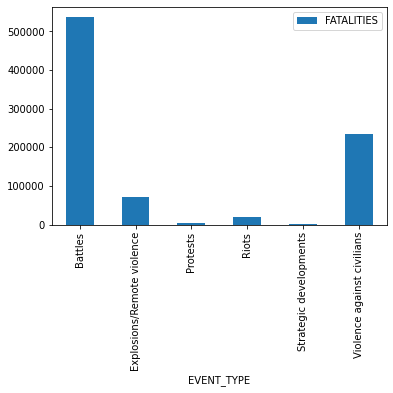

In [34]:
fatalities_per_event_type.plot(kind='bar')

In [43]:
crime.SUB_EVENT_TYPE.unique()

array(['Attack', 'Armed clash', 'Remote explosive/landmine/IED',
       'Shelling/artillery/missile attack', 'Peaceful protest',
       'Change to group/activity', 'Looting/property destruction',
       'Government regains territory', 'Disrupted weapons use',
       'Protest with intervention', 'Violent demonstration',
       'Mob violence', 'Air/drone strike', 'Other', 'Arrests',
       'Excessive force against protesters',
       'Abduction/forced disappearance', 'Suicide bomb', 'Grenade',
       'Non-violent transfer of territory',
       'Headquarters or base established', 'Agreement',
       'Non-state actor overtakes territory', 'Sexual violence',
       'Chemical weapon'], dtype=object)

In [44]:
fatalities_by_event = crime.groupby(['EVENT_TYPE', 'SUB_EVENT_TYPE'])[['FATALITIES']].sum()

In [45]:
fatalities_by_event

FATALITIES
EVENT_TYPE                 SUB_EVENT_TYPE                                 
Battles                    Armed clash                              493220
                           Government regains territory              19264
                           Non-state actor overtakes territory       23623
Explosions/Remote violence Air/drone strike                          26588
                           Chemical weapon                               8
                           Grenade                                    1822
                           Remote explosive/landmine/IED             23006
                           Shelling/artillery/missile attack         13829
                           Suicide bomb                               7197
Protests                   Excessive force against protesters         4212
                           Peaceful protest                              0
                           Protest with intervention                     0
Riots                      Mob violence                              12347
                           Violent demonstration                      7847
Strategic developments     Agreement                                     0
                           Arrests                                       0
                           Change to group/activity                      0
                           Disrupted weapons use                       595
                           Headquarters or base established              1
                           Looting/property destruction                  0
                           Non-violent transfer of territory             0
                           Other                                        96
Violence against civilians Abduction/forced disappearance                0
                           Attack                                   230306
                           Sexual violence                            4570

In [47]:
crime.isnull().sum()

EVENT_ID_CNTY              0
EVENT_DATE                 0
YEAR                       0
TIME_PRECISION             0
DISORDER_TYPE              0
EVENT_TYPE                 0
SUB_EVENT_TYPE             0
ACTOR1                     0
ASSOC_ACTOR_1         231997
INTER1                     0
ACTOR2                 86136
ASSOC_ACTOR_2         253699
INTER2                     0
INTERACTION                0
CIVILIAN_TARGETING    220363
ISO                        0
REGION                     0
COUNTRY                    0
ADMIN1                     2
ADMIN2                  2451
ADMIN3                161453
LOCATION                   0
LATITUDE                   0
LONGITUDE                  0
GEO_PRECISION              0
SOURCE                     0
SOURCE_SCALE               0
NOTES                      0
FATALITIES                 0
TAGS                  255561
TIMESTAMP                  0
dtype: int64

In [48]:
crime.INTER1.unique()

array([2, 1, 6, 3, 8, 5, 4, 7])

In [57]:
crime.INTER2.unique()

array([7, 2, 1, 0, 3, 4, 5, 8, 6])

In [110]:
#crime.groupby(['INTER1','ACTOR1'])
actor_counts = crime.groupby('INTER1')['ACTOR1'].nunique()

In [111]:
actor_counts

INTER1
1     788
2     331
3    1143
4    2822
5      61
6      69
7      23
8     275
Name: ACTOR1, dtype: int64

In [92]:
no_crimes_by_actor = crime.groupby(['INTER1', 'ACTOR1'])['ACTOR1'].count()

In [112]:
no_crimes_by_actor

INTER1  ACTOR1                                                               
1       Civilians' Protection Joint Forces (Sudan)                                 6
        Former Military Forces of Burkina Faso (1987-2014)                         2
        Former Military Forces of Libya (2014-) Haftar Faction - Saiqa Forces      1
        Former Military Forces of Rwanda (1994-)                                  11
        Former Military Forces of South Sudan (2011-)                              4
                                                                                ... 
8       UNMIS: United Nations Mission in Sudan (2005-2011)                         3
        UNMISS: United Nations Mission in the Republic of South Sudan (2011-)     15
        UNSMIL: United Nations Support Mission in Libya (2011-)                    2
        Unidentified Military Forces                                             176
        Wagner Group                                                    

In [113]:
no_crimes_by_actor[0:788]

INTER1  ACTOR1                                                                   
1       Civilians' Protection Joint Forces (Sudan)                                    6
        Former Military Forces of Burkina Faso (1987-2014)                            2
        Former Military Forces of Libya (2014-) Haftar Faction - Saiqa Forces         1
        Former Military Forces of Rwanda (1994-)                                     11
        Former Military Forces of South Sudan (2011-)                                 4
                                                                                     ..
        Police Forces of the Republic of Congo (1992-1997)                            2
        Police Forces of the Republic of Congo (1997-)                               32
        Police Forces of the Republic of Congo (1997-) Prison Guards                  1
        Pro-GNA Faction and/or Military Forces of Turkey (2016-)                     13
        Pro-Haftar Faction and/or Mili

In [115]:
no_crimes_by_actor[788:1119]

INTER1  ACTOR1                                                                       
2       ADF-NALU: Allied Democratic Forces-National Army for the Liberation of Uganda     685
        ADF: Allied Democratic Forces                                                    1619
        ADF: The Ambazonia Defense Forces                                                  16
        ADFL: Alliance of Democratic Forces for Liberation                                 87
        ADFM: Amhara Democratic Force Movement                                              2
                                                                                         ... 
        UPRC: Patriots' Union for Resistance in Congo                                       2
        URFF: United Revolutionary Forces Front                                             1
        UWSLF: United Western Somali Liberation Front                                       1
        WNBF: West Nile Bank Front                                  

In [117]:
no_crimes_by_actor[1119:2262]

INTER1  ACTOR1                                         
3       101 Battalion (Tajoura)                             8
        111th Brigade (Libya)                               1
        116th Brigade                                       2
        33rd Infantry Brigade                               1
        40 Thieves                                          1
                                                           ..
        Zamfara State Anti-thuggery Committee (Nigeria)     4
        Zaraguinas                                         13
        Zawiya Martyrs Brigade                              3
        Zawiya Security Directorate (Libya)                 2
        Zintan Martyrs Brigade                              2
Name: ACTOR1, Length: 1143, dtype: int64

In [116]:
788+331+1143

2262

In [123]:
country_count = crime.groupby('COUNTRY')['COUNTRY'].count().sort_values(axis=0, ascending=False)

In [127]:
country_count

COUNTRY
Somalia                                         39620
Nigeria                                         30390
Democratic Republic of Congo                    28607
Sudan                                           19219
South Africa                                    18703
Algeria                                         12199
Egypt                                           11457
Libya                                           11092
Kenya                                           10913
Burundi                                         10186
Tunisia                                          9966
Ethiopia                                         9707
South Sudan                                      8940
Mali                                             8333
Burkina Faso                                     8318
Uganda                                           8278
Cameroon                                         7107
Morocco                                          7090
Central African Repu

In [139]:
crime['EVENT_DATE'] = pd.to_datetime(crime['EVENT_DATE'])

In [140]:
crime.dtypes

EVENT_ID_CNTY                 object
EVENT_DATE            datetime64[ns]
YEAR                           int64
TIME_PRECISION                 int64
DISORDER_TYPE                 object
EVENT_TYPE                    object
SUB_EVENT_TYPE                object
ACTOR1                        object
ASSOC_ACTOR_1                 object
INTER1                         int64
ACTOR2                        object
ASSOC_ACTOR_2                 object
INTER2                         int64
INTERACTION                    int64
CIVILIAN_TARGETING            object
ISO                            int64
REGION                        object
COUNTRY                       object
ADMIN1                        object
ADMIN2                        object
ADMIN3                        object
LOCATION                      object
LATITUDE                     float64
LONGITUDE                    float64
GEO_PRECISION                  int64
SOURCE                        object
SOURCE_SCALE                  object
N

In [147]:
no_of_events_per_year = crime.groupby(['YEAR'])['YEAR'].count()

In [148]:
no_of_events_per_year

YEAR
1997     3209
1998     4545
1999     4882
2000     4175
2001     3610
2002     4297
2003     3750
2004     3174
2005     2909
2006     2739
2007     3897
2008     5084
2009     3865
2010     4402
2011     8146
2012     9788
2013    14232
2014    16588
2015    16998
2016    17315
2017    17656
2018    19798
2019    26004
2020    33421
2021    35442
2022    36829
2023     9185
Name: YEAR, dtype: int64

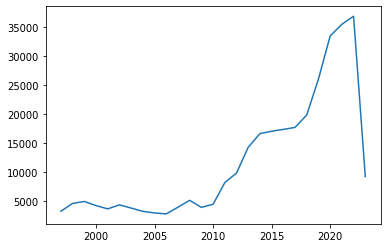

In [156]:
plt.plot(no_of_events_per_year.index, no_of_events_per_year.values)

In [149]:
no_of_events_per_day = crime.groupby(['EVENT_DATE'])['EVENT_DATE'].count()

In [154]:
no_of_events_per_day.values

array([ 18,   3,   6, ...,  70, 121,  32])

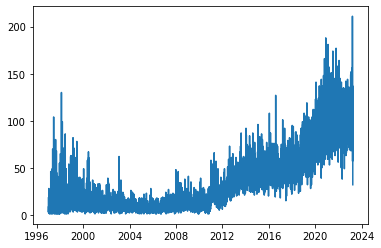

In [155]:
plt.plot(no_of_events_per_day.index, no_of_events_per_day.values)